In [76]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


<function sklearn.datasets._samples_generator.make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)>

In [4]:
class_data = pd.read_csv("class.csv")
class_data.head(5)

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [5]:
zoo_data = pd.read_csv("zoo.csv")
zoo_data.head(5)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


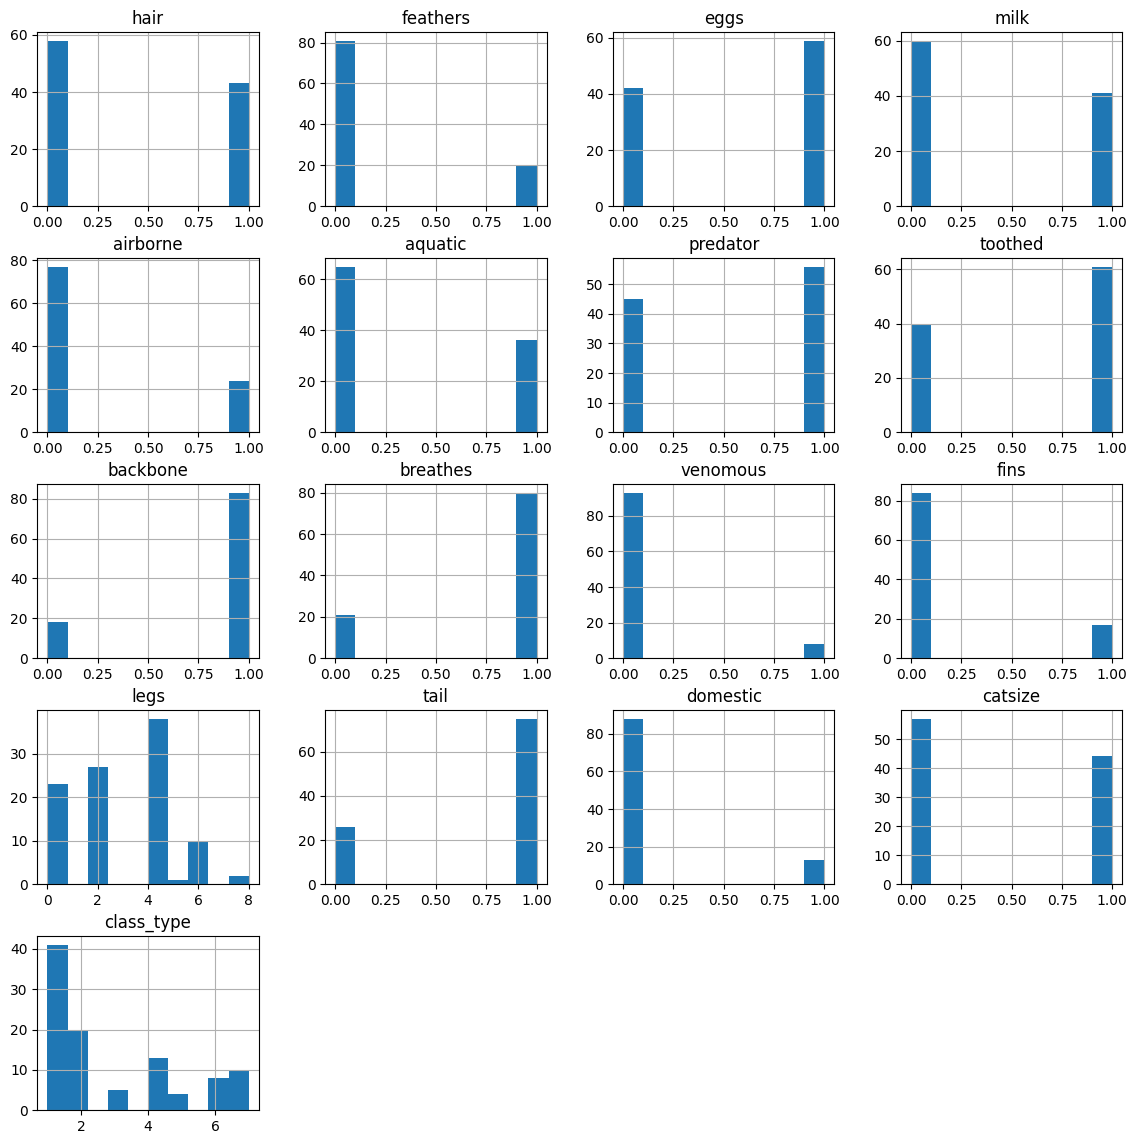

In [19]:
zoo_data.hist(figsize=(14,14), bins= 10);

In [122]:
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [123]:

df = zoo_data.iloc[:, 1:-1]
df.head(1)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1


In [124]:
#K-Mean Clustering 

# Create and fit K-Means model
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(df)

df["k_mean"] = kmeans.labels_

In [125]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,k_mean
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,4
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,0
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,6
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,4
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,0
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,3
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,4
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,5


In [126]:
new_col = pd.Series(zoo_data["animal_name"], name="animal_name")

In [127]:
labeled_data =df.assign(animal_name = new_col)

In [129]:
labeled_data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,k_mean,animal_name
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,4,aardvark
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,0,antelope
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,6,bass
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,4,bear
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,4,boar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,0,wallaby
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,3,wasp
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,4,wolf
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,5,worm


In [130]:
grouped_animals = labeled_data[["k_mean" , "animal_name"]]
grouped_animals

,k_mean,animal_name
0,4,aardvark
1,0,antelope
2,6,bass
3,4,bear
4,4,boar
...,...,...
96,0,wallaby
97,3,wasp
98,4,wolf
99,5,worm


In [131]:
list_animals = grouped_animals.groupby('k_mean')['animal_name'].apply(list).reset_index()
list_animals

,k_mean,animal_name
0,0,"[antelope, buffalo, calf, cavy, deer, elephant..."
1,1,"[dogfish, dolphin, pike, porpoise, seal, sting..."
2,2,"[chicken, crow, dove, duck, flamingo, gull, ha..."
3,3,"[crab, crayfish, flea, gnat, honeybee, housefl..."
4,4,"[aardvark, bear, boar, cheetah, frog, frog, le..."
5,5,"[clam, seawasp, slug, worm]"
6,6,"[bass, carp, catfish, chub, haddock, herring, ..."


In [117]:
class_data

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


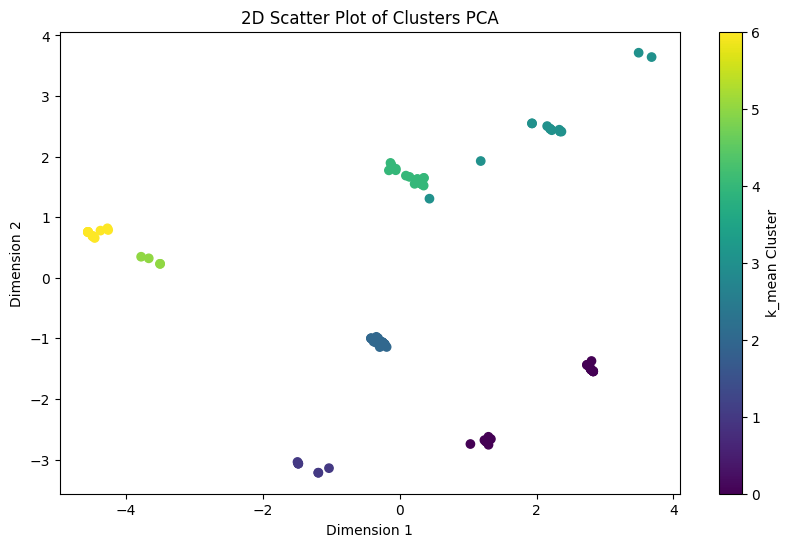

In [ ]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df["k_mean"])

# Add a color bar to show clusters
plt.colorbar(scatter, label='k_mean Cluster')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D Scatter Plot of Clusters (PCA or t-SNE)')
plt.show()